🎯 Challenge: Visualize and Analyze Time-Series Data for Website Traffic

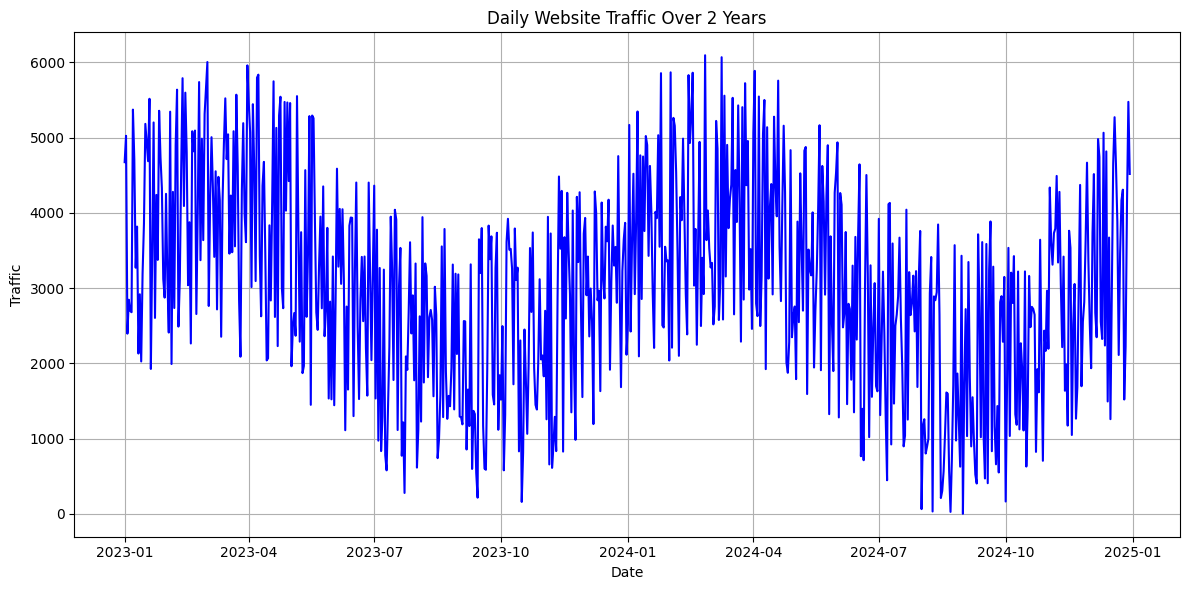

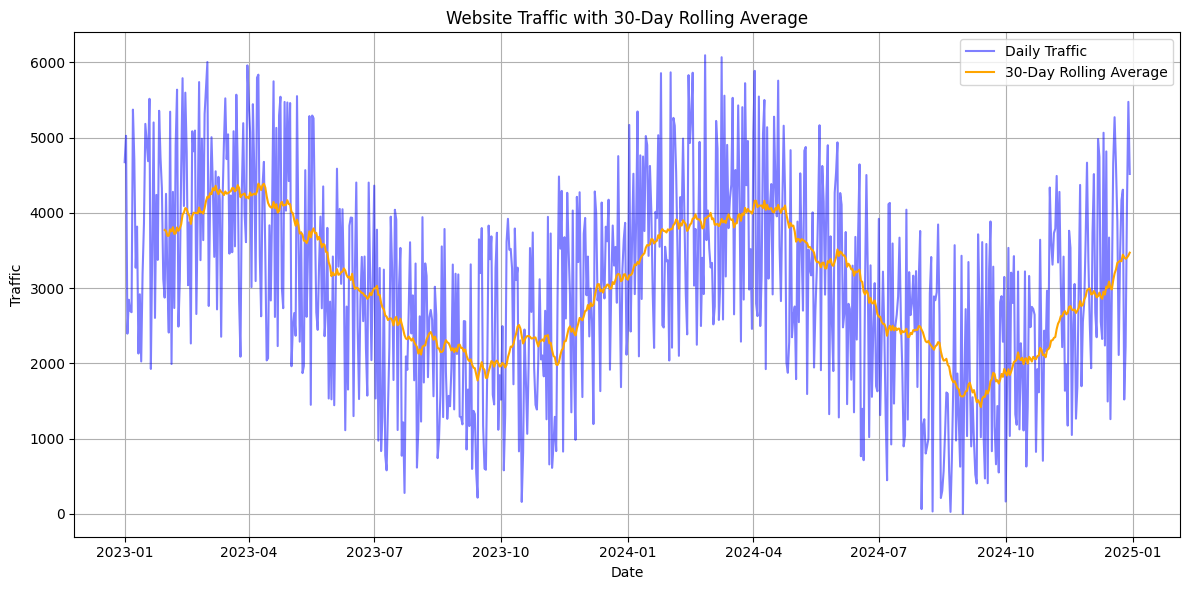

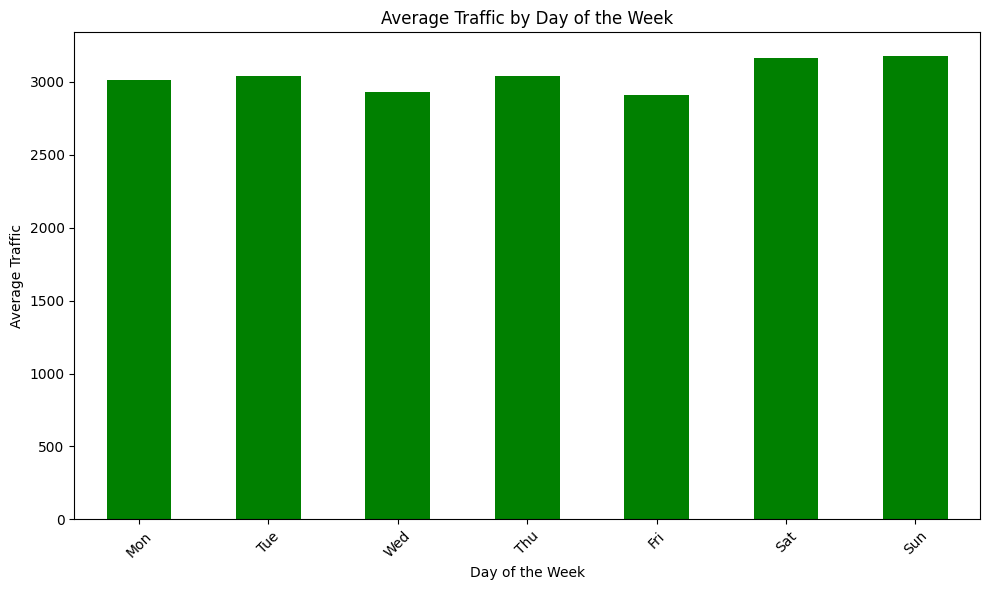

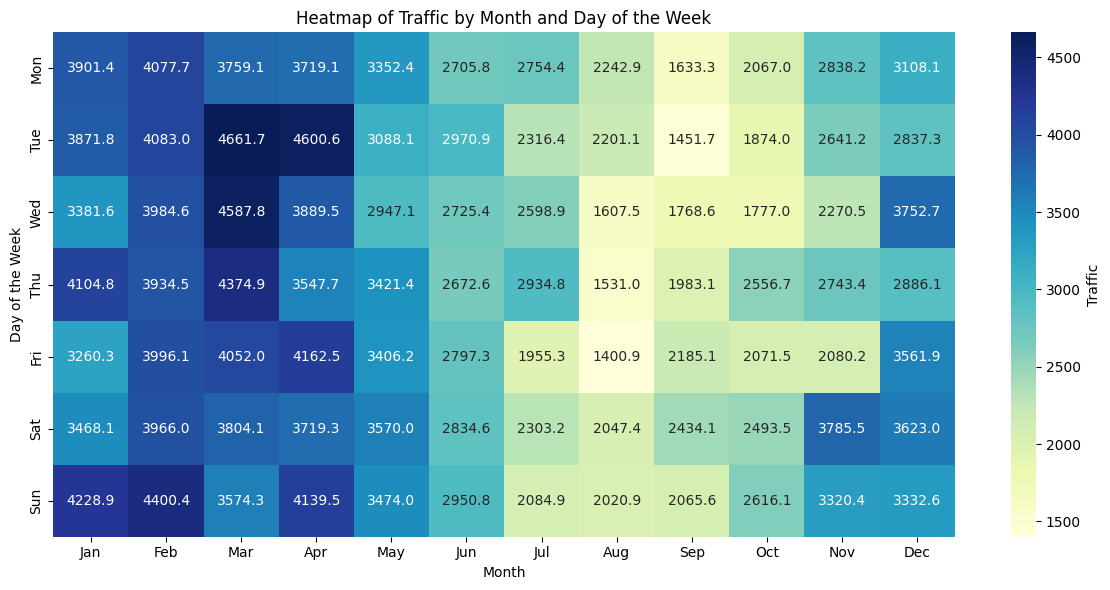

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Generate random traffic data for 2 years (730 days)
np.random.seed(42)
date_range = pd.date_range(start="2023-01-01", periods=730, freq='D')

# Simulate traffic: random daily traffic with some daily and weekly patterns
traffic = np.random.randint(1000, 5000, size=len(date_range)) + 1000 * np.sin(np.linspace(0, 4 * np.pi, len(date_range)))  # daily fluctuations
traffic = traffic + 500 * np.cos(np.linspace(0, 4 * np.pi, len(date_range)))  # weekly fluctuations

# Convert to a DataFrame
df_traffic = pd.DataFrame({'Date': date_range, 'Traffic': traffic})

# 1. **Time-Series Plot** showing daily website traffic
plt.figure(figsize=(12, 6))
plt.plot(df_traffic['Date'], df_traffic['Traffic'], color='blue')
plt.title("Daily Website Traffic Over 2 Years")
plt.xlabel("Date")
plt.ylabel("Traffic")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. **Rolling Average Plot** to smooth fluctuations
df_traffic['Rolling_Avg'] = df_traffic['Traffic'].rolling(window=30).mean()  # 30-day rolling average

plt.figure(figsize=(12, 6))
plt.plot(df_traffic['Date'], df_traffic['Traffic'], color='blue', alpha=0.5, label='Daily Traffic')
plt.plot(df_traffic['Date'], df_traffic['Rolling_Avg'], color='orange', label='30-Day Rolling Average')
plt.title("Website Traffic with 30-Day Rolling Average")
plt.xlabel("Date")
plt.ylabel("Traffic")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. **Weekly Traffic Pattern (Seasonality)**
# Aggregate traffic by day of the week (0=Monday, 6=Sunday)
df_traffic['Day_of_Week'] = df_traffic['Date'].dt.dayofweek
weekly_pattern = df_traffic.groupby('Day_of_Week')['Traffic'].mean()

plt.figure(figsize=(10, 6))
weekly_pattern.plot(kind='bar', color='green')
plt.title("Average Traffic by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Traffic")
plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.tight_layout()
plt.show()

# 4. **Heatmap of Traffic by Month and Day of the Week**
df_traffic['Month'] = df_traffic['Date'].dt.month
df_traffic['Day_of_Week'] = df_traffic['Date'].dt.dayofweek
pivot_data = df_traffic.pivot_table(values='Traffic', index='Day_of_Week', columns='Month', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, cmap="YlGnBu", annot=True, fmt='.1f', cbar_kws={'label': 'Traffic'},
            xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
            yticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title("Heatmap of Traffic by Month and Day of the Week")
plt.xlabel("Month")
plt.ylabel("Day of the Week")
plt.tight_layout()
plt.show()
